In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x1=np.arange(20)
x2=np.random.rand(x1.size)*20

In [3]:
x2.shape

(20,)

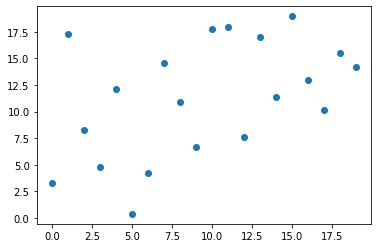

In [4]:
plt.scatter(x1,x2) #x1 and x2 are sample

In [5]:
y=np.where(x1-x2>=0,0,1)

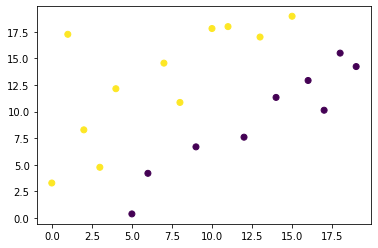

In [6]:
plt.scatter(x1,x2,c=y)

Mughe bs ye hai ki Logistic regression ko data dene ke baad kaha pr line bnta hai.

In [7]:
X=np.hstack([x1.reshape(-1,1),x2.reshape(-1,1)])

In [8]:
X.shape

(20, 2)

In [9]:
y.shape

(20,)

In [10]:
from sklearn.linear_model import LogisticRegression

log=LogisticRegression()
log.fit(X,y)

LogisticRegression()

In [11]:
log.coef_

array([[-0.99682255,  0.91727581]])

In [12]:
log.intercept_

array([0.42067558])

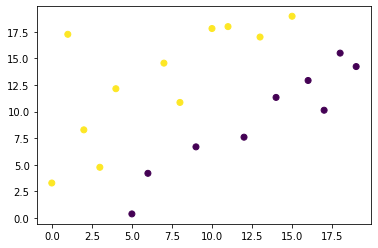

In [13]:
plt.scatter(x1,x2,c=log.predict(X))

How to see Decision Line:

distance = W^TX+b

=m1x1 + m2x2 +b


We Can See decision line directly using ML decision Plotiing tool.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


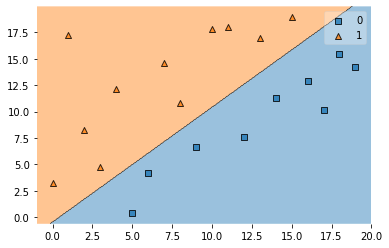

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=log)#clf means classifier

#Implementation Of Logistic Regression From Scratch.

In [15]:
class LogisticRegressionCustom:
  def __init__(self,learning_rate,iterations):
    self.learning_rate=learning_rate
    self.iterations=iterations

  def fit(self,X,y):
    row,col = X.shape
    self.W=np.random.rand(col)
    self.b=np.random.rand()

    for i in range(self.iterations):

      #distance = X.dot(self.W)+self.b
      y_pred = self.predict(X)
      y_diff = y_pred-y

      dw = (X.T).dot(y_diff)/row
      db = y_diff.sum()/row

      self.W=self.W-self.learning_rate*dw
      self.b=self.b-self.learning_rate*db


  def predict(self,X):   
    distance = X.dot(self.W)+self.b
    y_pred = self.sigmoid(distance)
    return np.round(y_pred)

  def sigmoid(self,x):
    return 1/(1+np.exp(-x))   

In [16]:

log_custom=LogisticRegressionCustom(0.01,1000)

In [17]:
log_custom.fit(X,y)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


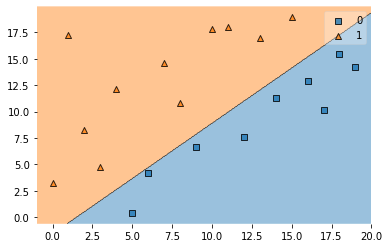

In [18]:
plot_decision_regions(X,y,clf=log_custom)

#SoftMax

In [19]:
x1=np.arange(50)
x2=np.random.rand(x1.size)*50

In [22]:
y=(x1*x2)%3

In [24]:
y=y.astype('int8')

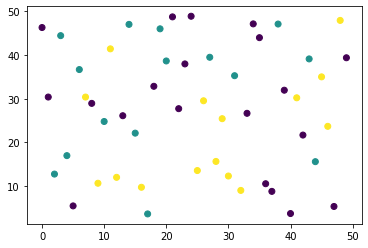

In [25]:
plt.scatter(x1,x2,c=y)

log_multi=LogisticRegression(multi_class='multinomial')

In [26]:
X=np.hstack([x1.reshape(-1,1),x2.reshape(-1,1)])
log_multi.fit(X,y)

LogisticRegression(multi_class='multinomial')

In [27]:
y_pred_multi = log_multi.predict(X)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred_multi)

0.5

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


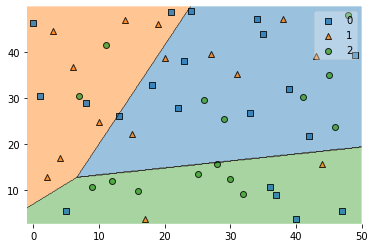

In [29]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=log_multi)